# **Exercise 3: Prediction or Classification Algorithm (2 hours)**

Scenario:
Our company wants to predict the likelihood of a customer filing a claim in the next 12 months. No dataset is provided, so you will need to either:

1. Create a synthetic dataset using your own assumptions, or
Download publicly available data and adapt it to the scenario.

Goal:
1. Build a classification model to predict whether a customer will file a claim.
2. Explain your reasoning for choosing the model.
3. Evaluate the model's performance (e.g., precision, recall).


# New Section

# 1. Creation of a synthetic datasets
this data contains  features like age, gender, premium type, and signup date. Each customer is associated with between 1 to 5 policies, and each policy has details such as insurance type, annual premium, coverage amount, payment frequency, and policy duration. Additionally, the dataset includes claims data (from 0 to 4 claims per policy) such as claim dates, claim amounts, and incident types.

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Number of synthetic customers
num_samples = 5000

# 1. Generate synthetic customer data
customers_data = {
    'customer_id': np.arange(1, num_samples + 1),

    # Age using Gaussian distribution (Mean=40, Std Dev=10)
    'age': np.random.normal(40, 10, num_samples).clip(18, 70).astype(int),  # Ensure age is between 18 and 70

    # Gender (50% chance for male or female)
    'gender': np.random.choice(['M', 'F'], num_samples),

    # Premium type (10% chance for "Premium", 90% for "Standard")
    'premium': np.random.choice(['Premium', 'Standard'], num_samples, p=[0.1, 0.9]),

    # Signup date within the last 3 years
    'signup_date': [datetime.today() - timedelta(days=np.random.randint(0, 365*3)) for _ in range(num_samples)],  # From 3 years ago to today
}

# Convert to DataFrame
df_customers = pd.DataFrame(customers_data)

# 2. Generate synthetic policies data (1 to 5 policies per customer)
policy_data = {
    'policy_id': [],
    'customer_id': [],
    'insurance_type': [],
    'annual_premium': [],
    'policy_status': [],
    'coverage_amount': [],
    'payment_frequency': [],
    'policy_duration': []  # Add policy duration as a feature
}

# Randomly assigning policies to customers
for customer_id in df_customers['customer_id']:
    # Randomly assign 1 to 5 policies per customer
    num_policies = np.random.randint(1, 6)

    for _ in range(num_policies):
        policy_data['policy_id'].append(len(policy_data['policy_id']) + 1)  # Unique policy ID
        policy_data['customer_id'].append(customer_id)

        # Randomly assign insurance type (Home, Auto, Life)
        policy_data['insurance_type'].append(np.random.choice(['Home', 'Auto', 'Life']))

        # Annual premium with normal distribution (Mean=1200, Std Dev=300)
        policy_data['annual_premium'].append(np.random.normal(1200, 300))

        # Randomly assign a policy status (Active, Expired, Suspended)
        policy_data['policy_status'].append(np.random.choice(['Active', 'Expired', 'Suspended']))

        # Coverage amount (Random between $50,000 and $500,000)
        policy_data['coverage_amount'].append(np.random.uniform(50000, 500000))

        # Payment frequency (Monthly, Quarterly, Annually)
        policy_data['payment_frequency'].append(np.random.choice(['Monthly', 'Quarterly', 'Annually']))

        # Policy duration (Random duration between 1 and 12 months)
        policy_data['policy_duration'].append(np.random.randint(1, 13))

df_policies = pd.DataFrame(policy_data)

# 3. Generate synthetic claims data (0 to 1 claim per customer, 30% of customers will file a claim)
claims_data = {
    'claim_id': [],
    'customer_id': [],
    'policy_id': [],
    'claim_date': [],
    'claim_amount': [],
    'incident_type': [],
}

# Adjusting for realistic claim generation
# Let's assume only 30% of customers file at least one claim
claim_probability = 0.3

# Select 30% of customers to file claims
customers_with_claims = np.random.choice(df_customers['customer_id'], size=int(num_samples * claim_probability), replace=False)

# Randomly assigning claims to selected customers' policies
for customer_id in customers_with_claims:
    # Get the policies for this customer
    customer_policies = df_policies[df_policies['customer_id'] == customer_id]

    for policy_id in customer_policies['policy_id']:
        # Randomly assign 0 or 1 claim per policy for this customer
        num_claims = np.random.randint(0, 2)  # 0 or 1 claim per policy

        for _ in range(num_claims):
            claims_data['claim_id'].append(len(claims_data['claim_id']) + 1)  # Unique claim ID
            claims_data['customer_id'].append(customer_id)  # Corresponding customer ID
            claims_data['policy_id'].append(policy_id)  # Corresponding policy ID

            # Claim date within the last 12 months
            claims_data['claim_date'].append(datetime.today() - timedelta(days=np.random.randint(0, 365)))

            # Claim amount with normal distribution (Mean=500, Std Dev=200)
            claims_data['claim_amount'].append(np.random.normal(500, 200))

            # Random incident type (Accident, Theft, Illness)
            claims_data['incident_type'].append(np.random.choice(['Accident', 'Theft', 'Illness']))

df_claims = pd.DataFrame(claims_data)








The target variable, yearly_claim, is binary, where 1 indicates that the customer filed at least one claim in the last 12 months, and 0 indicates no claims were filed. This dataset is designed to train machine learning models to predict the likelihood of future claims based on historical behavior and policy details.

In [ ]:
# 4. Create the target variable: filed_claim_in_next_12_months (yearly_claim)
df_customers['yearly_claim'] = 0  # Default is 0 (no claim filed in the last 12 months)

# Set the target variable (1 if at least one claim is filed in the last 12 months, else 0)
for customer_id in df_customers['customer_id']:
    # Get all claims for the customer in the last 12 months
    claims_in_last_12_months = df_claims[
        (df_claims['customer_id'] == customer_id) &
        (df_claims['claim_date'] > datetime.today() - timedelta(days=365))  # Claims in the last 12 months
    ]

    # If there are any claims in the last 12 months, mark the target as 1
    if not claims_in_last_12_months.empty:
        df_customers.loc[df_customers['customer_id'] == customer_id, 'yearly_claim'] = 1

# Merge customer, policy, and claims data
df = pd.merge(df_customers, df_policies, on='customer_id', how='left')
df = pd.merge(df, df_claims[['policy_id', 'claim_amount']], on='policy_id', how='left')

# Show the first few rows of the merged dataset
df.head()


,customer_id,age,gender,premium,signup_date,yearly_claim,policy_id,insurance_type,annual_premium,policy_status,coverage_amount,payment_frequency,policy_duration,claim_amount
0,1,44,F,Standard,2023-09-02 17:27:48.630242,1,1,Home,1484.088484,Active,101184.358736,Monthly,4,381.723494
1,1,44,F,Standard,2023-09-02 17:27:48.630242,1,2,Auto,1327.329561,Suspended,133838.113178,Annually,12,NaN
2,1,44,F,Standard,2023-09-02 17:27:48.630242,1,3,Life,1076.192952,Suspended,214642.266417,Annually,3,113.673492
3,1,44,F,Standard,2023-09-02 17:27:48.630242,1,4,Life,1087.524098,Active,147136.055344,Quarterly,3,NaN
4,1,44,F,Standard,2023-09-02 17:27:48.630242,1,5,Home,1074.280577,Expired,96085.905407,Monthly,5,290.901267


In [ ]:
# Show the proportions of users with yearly_claim = 1 in the final combined dataset
yearly_claim_proportions = df['yearly_claim'].value_counts(normalize=True)

print(yearly_claim_proportions)

yearly_claim
0    0.733866
1    0.266134
Name: proportion, dtype: float64


# Exploratory Data Analysis (EDA)
1. Descriptive Statistics for the Merged Dataset

In [ ]:
# Descriptive statistics for numerical columns
df.describe()

,customer_id,age,signup_date,yearly_claim,policy_id,annual_premium,coverage_amount,policy_duration,claim_amount
count,15015.000000,15015.000000,15015,15015.000000,15015.000000,15015.000000,15015.000000,15015.000000,2219.000000
mean,2500.482651,39.606127,2023-06-14 16:01:18.315056384,0.266134,7508.000000,1200.942091,275887.405111,6.506560,499.273651
min,1.000000,18.000000,2021-12-19 17:27:48.630314,0.000000,1.000000,97.618098,50041.970610,1.000000,-44.200759
25%,1241.000000,33.000000,2022-09-11 17:27:48.649152,0.000000,3754.500000,994.358962,165358.695904,4.000000,367.052260
50%,2496.000000,40.000000,2023-06-07 17:27:48.651194880,0.000000,7508.000000,1201.804429,275278.414357,6.000000,501.209589
75%,3749.500000,46.000000,2024-03-20 17:27:48.630603008,1.000000,11261.500000,1403.933194,388958.153991,10.000000,634.533561
max,5000.000000,70.000000,2024-12-17 17:27:48.637694,1.000000,15015.000000,2543.725275,499960.390896,12.000000,1232.710285
std,1449.780393,9.793963,NaN,0.441950,4334.601481,301.751113,129031.149847,3.451689,195.542914


In [ ]:
# Descriptive statistics for categorical columns
df.describe(include=['object'])

,gender,premium,insurance_type,policy_status,payment_frequency
count,15015,15015,15015,15015,15015
unique,2,2,3,3,3
top,M,Standard,Home,Active,Annually
freq,7645,13513,5026,5057,5031


Distribution of Numerical Features


<ipython-input-43-a389f81e59b4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='policy_duration', data=df, palette='Set1')


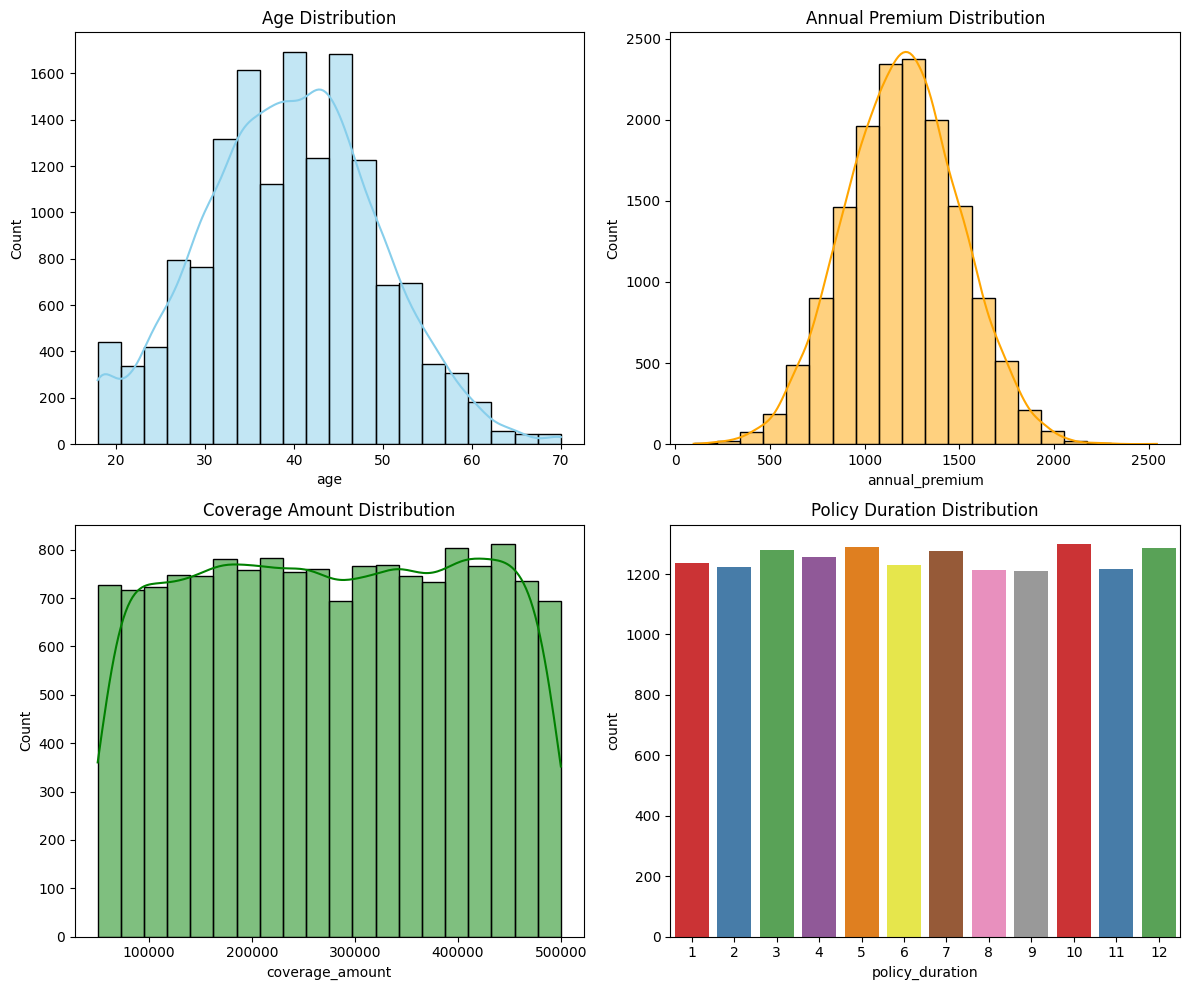

In [ ]:
import seaborn as sns

# Plot the distribution of numerical features
plt.figure(figsize=(12, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution')

# Annual premium distribution
plt.subplot(2, 2, 2)
sns.histplot(df['annual_premium'], kde=True, color='orange', bins=20)
plt.title('Annual Premium Distribution')

# Coverage amount distribution
plt.subplot(2, 2, 3)
sns.histplot(df['coverage_amount'], kde=True, color='green', bins=20)
plt.title('Coverage Amount Distribution')

# Policy duration distribution
plt.subplot(2, 2, 4)
sns.countplot(x='policy_duration', data=df, palette='Set1')
plt.title('Policy Duration Distribution')

plt.tight_layout()
plt.show()


<ipython-input-44-f57556fcc50d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='premium', data=df, palette='Set2')
<ipython-input-44-f57556fcc50d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='insurance_type', data=df, palette='Set3')
<ipython-input-44-f57556fcc50d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='policy_status', data=df, palette='Set1')
<ipython-input-44-f57556fcc50d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

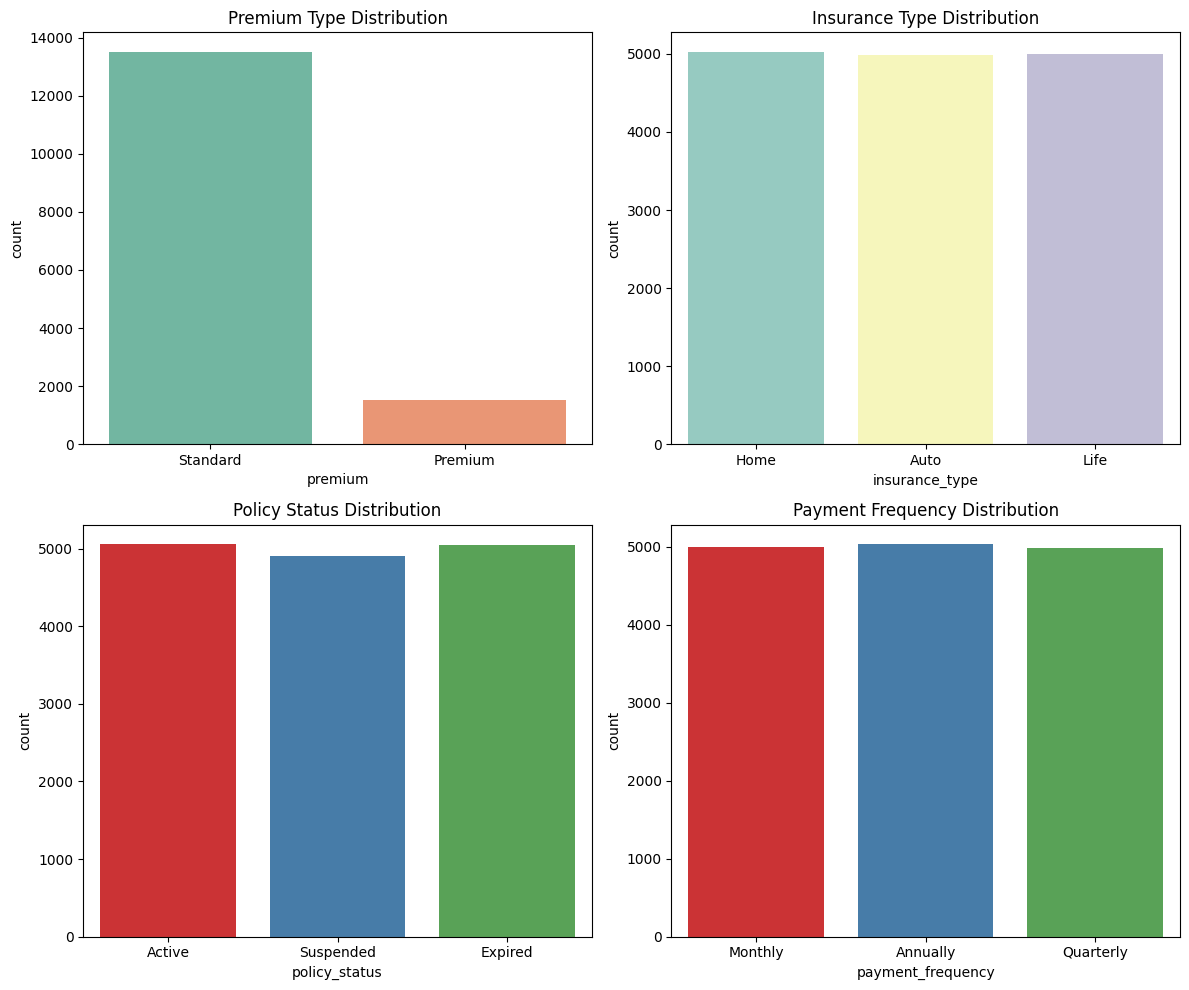

In [ ]:
# Plot the distribution of categorical features
plt.figure(figsize=(12, 10))

# Premium type distribution
plt.subplot(2, 2, 1)
sns.countplot(x='premium', data=df, palette='Set2')
plt.title('Premium Type Distribution')

# Insurance type distribution
plt.subplot(2, 2, 2)
sns.countplot(x='insurance_type', data=df, palette='Set3')
plt.title('Insurance Type Distribution')

# Policy status distribution
plt.subplot(2, 2, 3)
sns.countplot(x='policy_status', data=df, palette='Set1')
plt.title('Policy Status Distribution')

# Payment frequency distribution
plt.subplot(2, 2, 4)
sns.countplot(x='payment_frequency', data=df, palette='Set1')
plt.title('Payment Frequency Distribution')

plt.tight_layout()
plt.show()


In [ ]:
import sys
!{sys.executable} -m pip install xgboost

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fitting XGBoost model...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting Random Forest model...
Fitting Neural Network model...
Starting cross-validation...
Training XGBoost for fold 1...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:19:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest for fold 1...
Training Neural Network for fold 1...
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training XGBoost for fold 2...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:19:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest for fold 2...
Training Neural Network for fold 2...
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training XGBoost for fold 3...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest for fold 3...
Training Neural Network for fold 3...
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training XGBoost for fold 4...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:20:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest for fold 4...
Training Neural Network for fold 4...
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training XGBoost for fold 5...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:20:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest for fold 5...
Training Neural Network for fold 5...
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Plotting ROC curve...


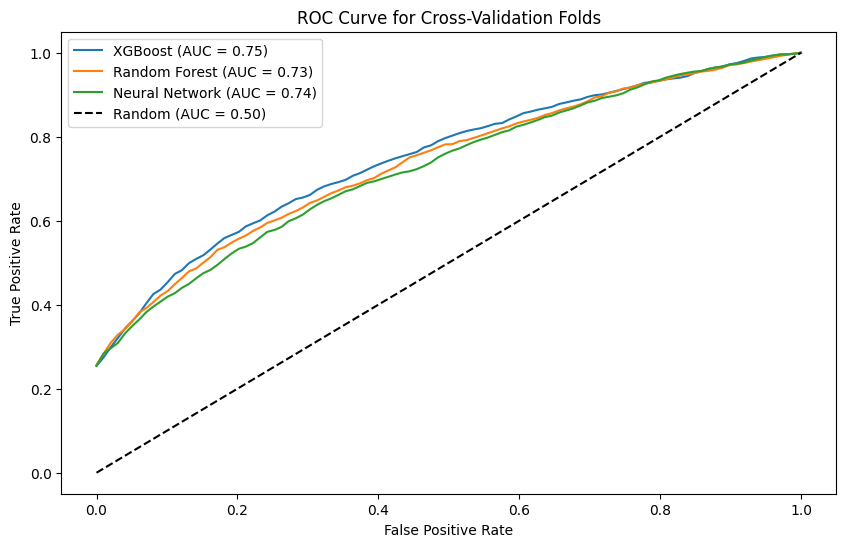


XGBoost - Average ROC-AUC Score: 0.7473

XGBoost - Average ROC-AUC Score: 0.7473

Random Forest - Average ROC-AUC Score: 0.7348

Random Forest - Average ROC-AUC Score: 0.7348

Neural Network - Average ROC-AUC Score: 0.7376

Neural Network - Average ROC-AUC Score: 0.7376


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint

# Set random seed for reproducibility
np.random.seed(42)

# Load your dataset (using the final dataset df you've created)
X = df[['age', 'annual_premium', 'coverage_amount', 'policy_status', 'payment_frequency', 'policy_duration', 'premium']]
y = df['yearly_claim']

# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Scaling
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

# RandomizedSearch for XGBoost
xgb_param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(50, 200)
}

# RandomizedSearch for Random Forest
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10)
}

# RandomizedSearch for XGBoost
xgb_random = RandomizedSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                                param_distributions=xgb_param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1, scoring='roc_auc')

# RandomizedSearch for Random Forest
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=rf_param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1, scoring='roc_auc')

# Fit XGBoost RandomizedSearch
print("Fitting XGBoost model...")
xgb_random.fit(X_train, y_train)

# Fit Random Forest RandomizedSearch
print("Fitting Random Forest model...")
rf_random.fit(X_train, y_train)

# Train Neural Network
print("Fitting Neural Network model...")
models['Neural Network'].compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
models['Neural Network'].fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Store trained models
trained_models = {
    "XGBoost": xgb_random.best_estimator_,
    "Random Forest": rf_random.best_estimator_,
    "Neural Network": models['Neural Network']
}

# Initialize variables to store the average FPR and TPR for each model
avg_fpr = {model_name: [] for model_name in models.keys()}
avg_tpr = {model_name: [] for model_name in models.keys()}
roc_auc_scores = {model_name: [] for model_name in models.keys()}

# Cross-validation and ROC-AUC calculation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Starting cross-validation...")

for fold, (train_idx, test_idx) in enumerate(kf.split(X_resampled, y_resampled)):
    X_train_fold, X_test_fold = X_resampled[train_idx], X_resampled[test_idx]
    y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]

    for model_name, model in trained_models.items():
        print(f"Training {model_name} for fold {fold+1}...")

        # Train model
        if model_name == "Neural Network":
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
        else:
            model.fit(X_train_fold, y_train_fold)

        # Predict probabilities
        if model_name == "Neural Network":
            # For Neural Network, use model.predict() to get probabilities
            y_pred_prob = model.predict(X_test_fold)[:, 0]
        else:
            y_pred_prob = model.predict_proba(X_test_fold)[:, 1]  # For XGBoost and Random Forest

        # Compute False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
        fpr, tpr, _ = roc_curve(y_test_fold, y_pred_prob)

        # Append the FPR and TPR for each model
        avg_fpr[model_name].append(fpr)
        avg_tpr[model_name].append(tpr)

        # Calculate and store ROC-AUC score
        roc_auc = roc_auc_score(y_test_fold, y_pred_prob)
        roc_auc_scores[model_name].append(roc_auc)

# Average the FPR and TPR across all folds for each model
for model_name in models.keys():
    # Interpolate the FPR and TPR to have the same shape
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.interp(mean_fpr, avg_fpr[model_name][0], avg_tpr[model_name][0])

    avg_fpr[model_name] = mean_fpr
    avg_tpr[model_name] = mean_tpr

# Plot ROC Curve for all models
print("Plotting ROC curve...")
plt.figure(figsize=(10, 6))

for model_name in models.keys():
    plt.plot(avg_fpr[model_name], avg_tpr[model_name], label=f'{model_name} (AUC = {np.mean(roc_auc_scores[model_name]):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cross-Validation Folds')
plt.legend(loc='best')
plt.show()

# Print average performance metrics across all models
for model_name in models.keys():
    print(f"\n{model_name} - Average ROC-AUC Score: {np.mean(roc_auc_scores[model_name]):.4f}")
    print(f"\n{model_name} - Average ROC-AUC Score: {np.mean(roc_auc_scores[model_name]):.4f}")
